In [45]:
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
new_house_features = pd.read_csv('new_house_features.csv')

In [47]:
new_house_features.head(2)

,price,bed,bath,sqft,year_built,lot_size,num_photos
0,1925000,2,2,1212,2009,10174.0,13
1,330000,4,2,1629,1930,5057.0,3


In [48]:
new_house_features.shape

(1150, 7)

In [49]:
#Check for nulls: 

new_house_features.isnull().sum()

price         0
bed           0
bath          0
sqft          0
year_built    0
lot_size      0
num_photos    0
dtype: int64

In [50]:
uniqueValues = new_house_features['year_built'].unique()
uniqueValues



array(['2009', '1930', '2003', '1960', '2021', '1901', '1986', '1910',
       '1965', '1990', '1975', '1940', '1935', '1945', '1987', '1966',
       '1970', '1980', '1915', '1925', '1983', '1998', '1999', '2015',
       '1982', '1997', '1950', '1951', '1920', '2018', '1991', '1974',
       '1971', '1956', '1955', '2013', '1962', '1978', '1880', '1899',
       '2020', '1985', '1996', '2017', '2001', '1905', '1993', '1989',
       '1988', '2005', '1900', '2016', '1972', '2004', '2006', '2007',
       '1968', '1994', '1981', '1931', '2022', '2002', 'No Data', '2000',
       '1957', '1995', '1973', '1992', '1918', '1923', '2014', '1976',
       '1948', '1921', '1979', '2019', '1954', '1977', '1912', '1919',
       '1963', '1967', '1969', '1932', '1875', '2008', '1984', '1958',
       '1964', '1953', '1872', '2010', '1961', '2011', '1860', '1926',
       '1937', '1833', '2012', '1941', '1924', '1946', '1907', '1952',
       '1835', '1942', '1947'], dtype=object)

In [51]:
new_house_features= new_house_features[new_house_features.year_built  != 'No Data']
new_house_features

#df = df[df.line_race != 0]

,price,bed,bath,sqft,year_built,lot_size,num_photos
0,1925000,2,2,1212,2009,10174.0,13
1,330000,4,2,1629,1930,5057.0,3
2,559000,3,3,1800,2003,1711.0,25
3,738888,4,3,1860,1960,4000.0,68
4,569900,3,4,1747,2021,2090.0,39
...,...,...,...,...,...,...,...
1145,700000,4,3,2520,1920,5750.0,5
1146,549000,3,2,1226,1935,2400.0,41
1147,2699999,4,5,5794,2008,11718.0,34
1148,2500000,5,3,2280,1901,2000.0,12


In [52]:
new_house_features.bath.describe()

count    1148.000000
mean        2.707317
std         1.387344
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: bath, dtype: float64

In [53]:
uniqueValues = new_house_features['year_built'].unique()
uniqueValues



array(['2009', '1930', '2003', '1960', '2021', '1901', '1986', '1910',
       '1965', '1990', '1975', '1940', '1935', '1945', '1987', '1966',
       '1970', '1980', '1915', '1925', '1983', '1998', '1999', '2015',
       '1982', '1997', '1950', '1951', '1920', '2018', '1991', '1974',
       '1971', '1956', '1955', '2013', '1962', '1978', '1880', '1899',
       '2020', '1985', '1996', '2017', '2001', '1905', '1993', '1989',
       '1988', '2005', '1900', '2016', '1972', '2004', '2006', '2007',
       '1968', '1994', '1981', '1931', '2022', '2002', '2000', '1957',
       '1995', '1973', '1992', '1918', '1923', '2014', '1976', '1948',
       '1921', '1979', '2019', '1954', '1977', '1912', '1919', '1963',
       '1967', '1969', '1932', '1875', '2008', '1984', '1958', '1964',
       '1953', '1872', '2010', '1961', '2011', '1860', '1926', '1937',
       '1833', '2012', '1941', '1924', '1946', '1907', '1952', '1835',
       '1942', '1947'], dtype=object)

In [54]:

new_house_features['year_built'] = new_house_features['year_built'].astype(int)
new_house_features

,price,bed,bath,sqft,year_built,lot_size,num_photos
0,1925000,2,2,1212,2009,10174.0,13
1,330000,4,2,1629,1930,5057.0,3
2,559000,3,3,1800,2003,1711.0,25
3,738888,4,3,1860,1960,4000.0,68
4,569900,3,4,1747,2021,2090.0,39
...,...,...,...,...,...,...,...
1145,700000,4,3,2520,1920,5750.0,5
1146,549000,3,2,1226,1935,2400.0,41
1147,2699999,4,5,5794,2008,11718.0,34
1148,2500000,5,3,2280,1901,2000.0,12


<AxesSubplot:>

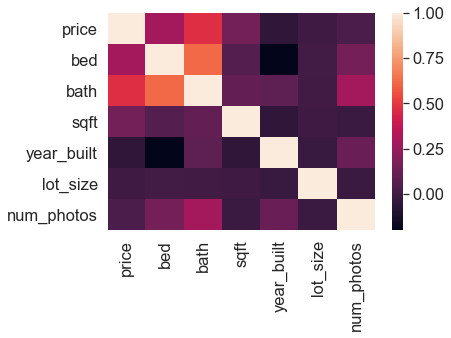

In [55]:
# check for any correlations between variables
corr = new_house_features.corr()
sns.heatmap(corr)
# number of bathrooms seems to have the highest influence on price, followed by number of bedrooms and squarefootage
#this is surprising because i would have expected squarefootage to have the greatest influence on price, 
#followed by number of bedrooms and number of bathrooms



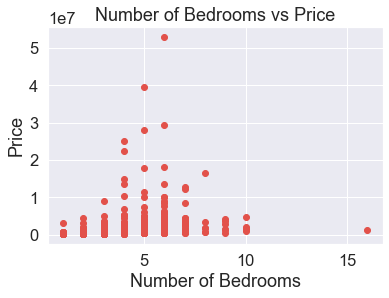

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [56]:
#Plotting some of the features against price: 

plt.scatter(new_house_features.bed, new_house_features.price)
plt.title("Number of Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

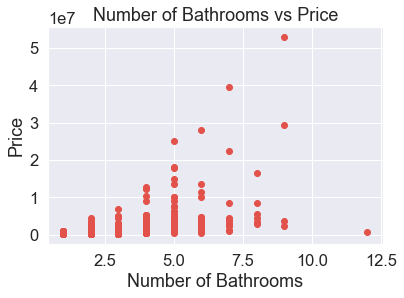

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [57]:
plt.scatter(new_house_features.bath, new_house_features.price)
plt.title("Number of Bathrooms vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()
sns.despine

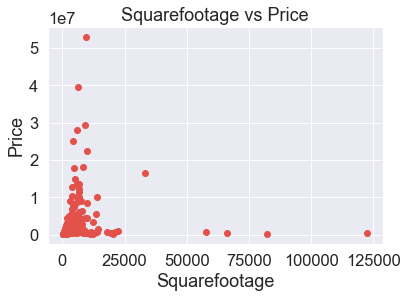

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [58]:
plt.scatter(new_house_features.sqft, new_house_features.price)
plt.title("Squarefootage vs Price")
plt.xlabel("Squarefootage")
plt.ylabel("Price")
plt.show()
sns.despine

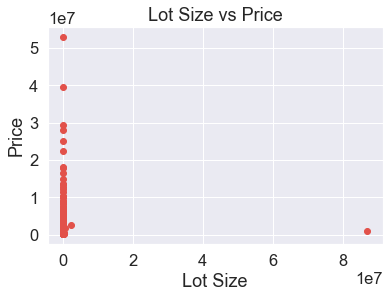

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [59]:
plt.scatter(new_house_features.lot_size, new_house_features.price)
plt.title("Lot Size vs Price")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.show()
sns.despine

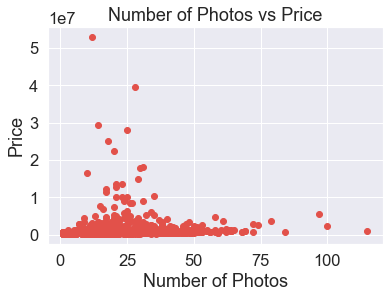

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [60]:
plt.scatter(new_house_features.num_photos, new_house_features.price)
plt.title("Number of Photos vs Price")
plt.xlabel("Number of Photos")
plt.ylabel("Price")
plt.show()
sns.despine

##  Building a simple linear regression model: 

In [24]:
# create x and y
feature_cols = 'bath' 
x = new_house_features[feature_cols].values.reshape(-1,1) # predictor
y = new_house_features.price # response
train1= new_house_features.drop(['lot_size', 'num_photos'], axis=1)





####Reference notes####

#x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

# Capture our feature (x) and target (y)
#X = df_anscombe_1['x'].values.reshape(-1, 1)  # SKLearn won't take a single Pandas Series
#y = df_anscombe_1['y']

# Let SKLearn fit the best line
#lm = LinearRegression()
#lm.fit(X, y)









In [25]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state =2) 
# the test set will be 20% of the whole data set

In [26]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [27]:
linreg.score(x_test,y_test)

0.14826625502823654

In [28]:
#Very small 

In [29]:
print(linreg.intercept_)

-1476332.3340953453


In [30]:
print(linreg.coef_)

[1023122.76495909]


In [31]:
#This slope means that for every additional bathroom, house price goes up $1,023,122 --> that seems wayyyyyy off. 
#Somethings wrong :/

In [39]:
#Making predictions: 

import numpy as np

x_train = np.array([[2]])
x_train.shape
linreg.predict(x_train)

array([569913.19582283])

For a house with 2 bathrooms, the price would be $569,913---> seems a tad high, although not improbable,domain knowledge tells me this feature isn't the main factor impacting the price. Must explore other features/ do some feature engineering..

## Multiple Features:

In [42]:
# Select our features

import statsmodels.api as sm

features = ['bed', 'bath', 'sqft', 'lot_size', 'year_built']
X = new_house_features[features]
X = sm.add_constant(X)  # We want our model to include a constant value (modeled by the y-intercept)

# Pick the target
y = new_house_features["price"]

# Fit model with target as housing price index
lm_2 = sm.OLS(y, X)  # Notice that `y` is first here

lm_2 = lm_2.fit()

# summarize our model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     73.01
Date:                Tue, 11 May 2021   Prob (F-statistic):           2.02e-66
Time:                        06:22:00   Log-Likelihood:                -18566.
No. Observations:                1148   AIC:                         3.714e+04
Df Residuals:                    1142   BIC:                         3.717e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.517e+07   4.39e+06      3.454      0.001    6.55e+06    2.38e+07
bed        -1.056e+05   6.94e+04     -1.521      0.128   -2.42e+05    3.06e+04
bath        1.067e+06   7.29e+04     14.637      0.000    9.24e+05    1.21e+06
sqft          50.7811     13.776      3.686      0.000      23.753      77.810
lot_size      -0.0092      0.029     -0.312      0.755      -0.067       0.049
year_built -8463.6876   2231.370     -3.793      0.000   -1.28e+04   -4085.643
==============================================================================
Omnibus:                     1783.428   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           822902.177
Skew:                           9.311   Prob(JB):                         0.00
Kurtosis:                     132.833   Cond. No.                     1.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#y-intercept is 1.517e+07
# bed has a coefficient of -1.056e+05
# bath has a coefficient of 1.067e+06
# sqft has a coefficient of 50.7811
# lot_size has a coefficient of -0.0092
#year_built has a coefficient of -8463.6876 

#is this saying bed and bath have inverse relationships with regards to their correlation with y? 

#if we keep bed constant, when bath increases by one unit, we predict price to go down by -1.056e+05 points.  


## Visualize

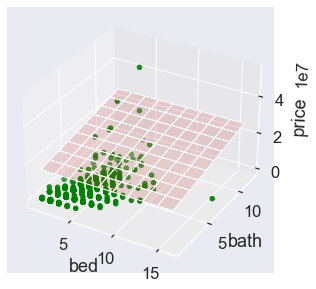

In [43]:
# Build a 3D axis
plt3d = plt.figure().gca(projection='3d')

# Create mesh grid for our two features (x_1 and x_2)
x_1 = np.linspace(X['bed'].min(), 
                  X['bed'].max(), 
                  10)

x_2 = np.linspace(X['bath'].min(), 
                  X['bath'].max(), 
                  10)

# This is exactly the linear combination above, to calculate y-hat!
y_pred = lm_2.params['const'] + \
         lm_2.params['bed'] * x_1 + \
         lm_2.params['bath'] * x_2

# The surface plotting requires `y` to be two dimensional (rows, columns)
y_pred = y_pred.reshape(-1, 1)

xx_1, xx_2 = np.meshgrid(x_1, x_2)

plt3d.plot_surface(xx_1, xx_2, y_pred, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()

ax.scatter(X['bed'], X['bath'], y, color='green')
ax.set_zlabel("price", rotation=90)
ax.set_xlabel("bed")
ax.set_ylabel("bath")

for a in ['x', 'y', 'z']:
    ax.locator_params(axis=a, nbins=4)

plt.tight_layout();

In [ ]:
#cant see whats going on here, seems like a lot of overlap. Might be a sign of multicolinearity?

## (Mis)interpretation (source: from lin reg theory intro book): (using to refer back) 
Looking at this image, we may be inclined to say something like a decrease in Labor Force % and a decrease in Long Interest Rate cause the HPI to increase. We cannot draw causation from this linear model..
There could be something we aren't measuring affecting the HPI and either of the features. It may be that HPI decreases with labor_force_pr, but we're seeing the increase due to the universal influence of some other factor (if this other confounding variable is categorical, we have a situation described in the last bullet here).
labor_force_pr and long_interest_rate may be linearly dependent. In this way, the model optimization process may assign coefficients arbitrarily between the two (since they could be written as linear combinations of the other, keeping one "constant" means the same thing for any constant).
The relationship could be purly spurious (unrelated), and we're essentially seeing a coincidence.
There are subgroups within either of these features that we're missing, which tell a more interesting story that negates our first intuition (See an illustartion of Edward H. Simpson's Paradox below, actually earlier recognized by Karl Pearson, et. al.).

#### Ignore the rest for now

In [36]:
#labels= new_house_features['price']
#conv_dates= [1 if values>=2010 else 0 for values in new_house_features.year_built]
#new_house_features['year_built']= conv_dates
#train1= new_house_features.drop(['lot_size', 'num_photos'], axis=1)

In [37]:
#from sklearn.model_selection import train_test_split

In [38]:
#x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [40]:
#linreg.fit(x_train,y_train)

In [41]:
#reg.score(x_test,y_test)